
- **.nsmallest()** -  позволяет выбрать n наименьших значений в Series

- **.nlargest()** - позволяет выбрать n наибольших значений в Series

- **.last()** - можно получить первое непустое значение в группах.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')


covid_df = pd.read_csv('data/covid_df.csv')
covid_df.pop('Unnamed: 0')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac


- date — дата наблюдения;

- country — наименование страны;

- confirmed — общее число зафиксированных случаев на указанный день;

- deaths — общее число зафиксированных смертей на указанный день;

- recovered — общее число выздоровлений на указанный день.

- active - общее число больных на данный момент

- daily_confirmed - число прироста заболевших

- daily_deaths - число прироста умерших

- daily_recovered - число прироста выздоровевших

- total_vaccinations — общее число введённых вакцин в стране на указанный день;

- people_vaccinated — общее число привитых первым компонентом в стране на указанный день;

- people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

- people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

- people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );

- daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);

- vaccines — комбинации вакцин, используемые в стране.

- death_rate — общий процент смертей среди зафиксированных случаев (летальность) и 

- recover_rate — общий процент случаев выздоровления. 

Основные параметры метода plot()


x — название признака, который будет отложен по оси абсцисс;

y — название признака, который будет отложен по оси ординат;

figsize — размер графика (кортеж из ширины и высоты в дюймах);

kind —тип визуализации. Основные типы:

- 'line' — линейный график (по умолчанию);

- 'bar' — столбчатая диаграмма;

- 'barh' — горизонтальная столбчатая диаграмма;

- 'hist' — гистограмма;

- 'box' — коробчатая диаграмма (boxplot);

- 'pie' — круговая диаграмма;

- 'scatter' — диаграмма рассеяния.

grid — отображение сетки (по умолчанию False);

legend — отображение легенды (по умолчанию False);

title — название графика;

color — цвет.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

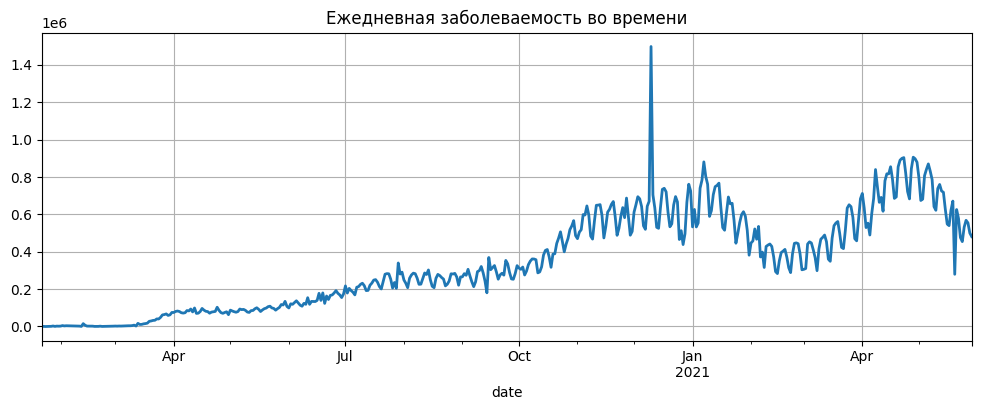

In [12]:
grouped_cases  = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12,4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=2
);

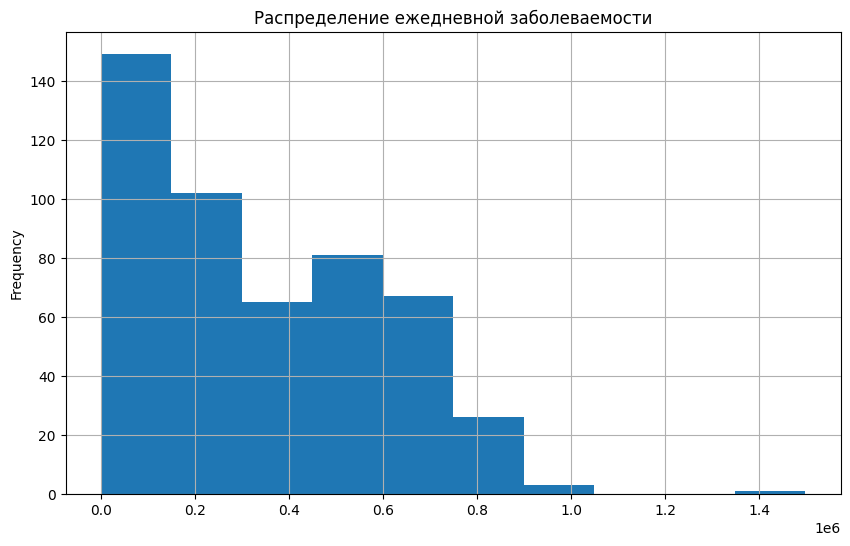

In [13]:
grouped_cases.plot(
    kind='hist',
    figsize=(10,6),
    title="Распределение ежедневной заболеваемости",
    grid=True,
    bins=10
);

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16736\3830503499.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_country = covid_df.groupby(['country'])['deaths', 'confirmed'].last()


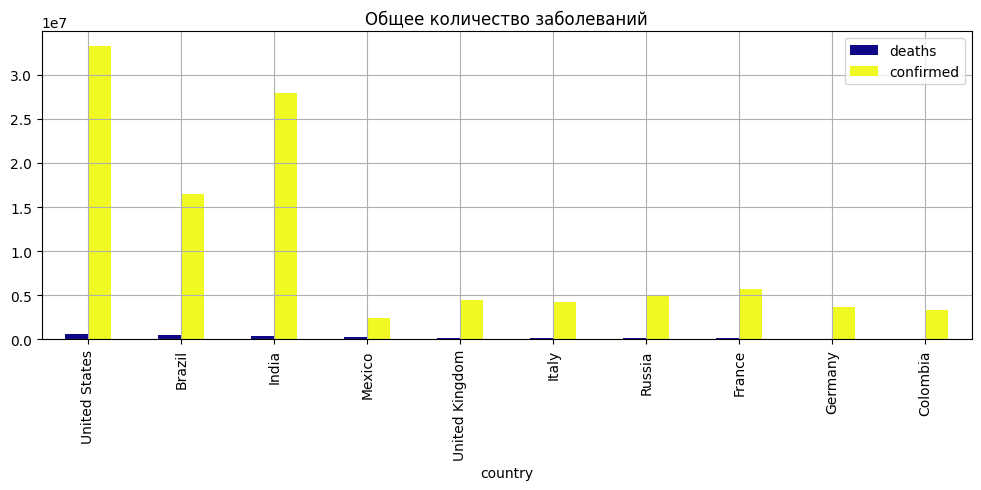

In [14]:
grouped_country = covid_df.groupby(['country'])['deaths', 'confirmed'].last()
grouped_country = grouped_country.nlargest(10,columns='deaths',)
grouped_country.plot(
    kind='bar',
    grid='True',
    figsize=(12,4),
    colormap='plasma',
    title='Общее количество заболеваний'
);

**.nsmallest()** -  позволяет выбрать n наименьших значений в Series
**.nlargest()** - позволяет выбрать n наибольших значений в Series
**.last()** - можно получить первое непустое значение в группах.

<Axes: xlabel='country'>

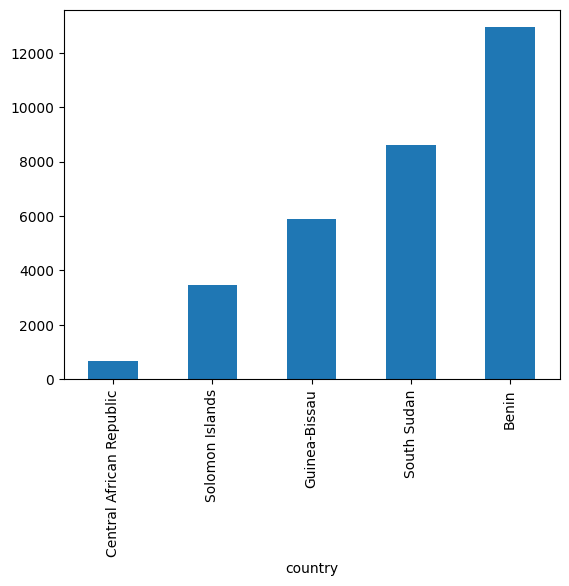

In [15]:
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

### ОСНОВНЫЕ ОБЪЕКТЫ MATPLOTLIB